<a href="https://colab.research.google.com/github/YishaZukhrufin/PCVK/blob/main/week04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama Kelompok:


1.   Mirza Priscilla F  (18) 2141720254
2. Tarista Dwi S (27) 2141720014
3. Tesya Eriana (28) 2141720024
4. Yisha Zukhrufin A (30) 2141720013



TUGAS PRAKTIKUM


In [ ]:
# Mengimpor modul 'drive' dari library Google Colab
from google.colab import drive

# Mount (mengaitkan) Google Drive ke dalam sesi Colab Anda
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.   Buat Gamma Coorection sesuai dengan petunjuk berikut

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


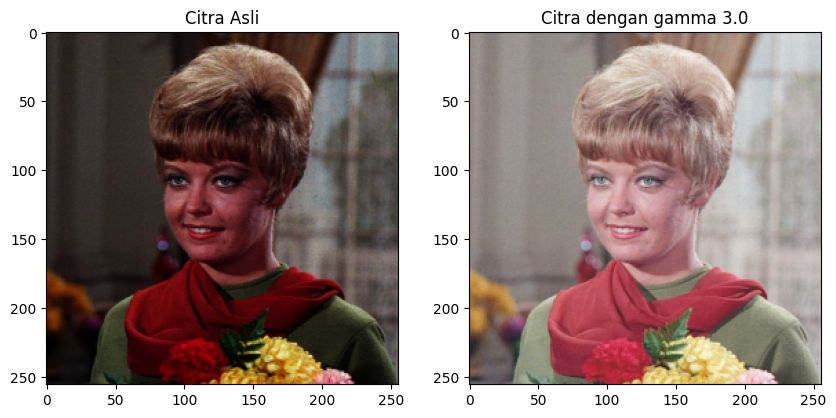

In [ ]:
# Mengimpor library OpenCV dengan alias 'cv'
import cv2 as cv

# Mengimpor fungsi 'cv2_imshow' dari 'google.colab.patches' untuk menampilkan gambar di Colab
from google.colab.patches import cv2_imshow

# Mengimpor library NumPy dengan alias 'np' untuk operasi numerik
import numpy as np

# Mengimpor library Matplotlib.pyplot dengan alias 'plt' untuk membuat plot gambar
import matplotlib.pyplot as plt

# Mencetak judul program
print('Gamma Correction pada citra')
print('----------------------------------')

try:
    # Meminta pengguna untuk memasukkan nilai gamma
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    # Jika pengguna memasukkan nilai yang bukan angka, tampilkan pesan kesalahan
    print('Error, bukan angka')
    exit()

# Membaca citra yang ingin diubah
nama_file_citra = '/content/drive/MyDrive/PCVK/female.tiff'  # Ganti dengan nama citra Anda
citra = cv.imread(nama_file_citra)

if citra is None:
    # Jika citra tidak dapat dibaca, tampilkan pesan kesalahan
    print(f'Error: Tidak dapat membaca citra {nama_file_citra}')
    exit()

# Melakukan koreksi gamma pada citra
gamma_corrected = np.power(citra / 255.0, 1.0 / gamma)
gamma_corrected = np.uint8(gamma_corrected * 255)

# Membuat plot dengan ukuran (7, 3)
plt.figure(figsize=(10, 5))

# Menampilkan citra asli di subplot pertama
plt.subplot(1, 2, 1)
plt.title('Citra Asli')  # Menampilkan judul
plt.imshow(cv.cvtColor(citra, cv.COLOR_BGR2RGB))  # Menampilkan citra asli
plt.axis('on')  # Menampilkan sumbu x dan y (grid)

# Menampilkan citra yang telah di-Gamma Correction di subplot kedua
plt.subplot(1, 2, 2)
plt.title(f'Citra dengan gamma {gamma}')  # Menampilkan judul dengan gamma yang digunakan
plt.imshow(cv.cvtColor(gamma_corrected, cv.COLOR_BGR2RGB))  # Menampilkan citra yang telah di-Gamma Correction
plt.axis('on')  # Menampilkan sumbu x dan y (grid)

# Menampilkan plot yang sudah dibuat
plt.show()



2.   Buat Simulasi Image Depth



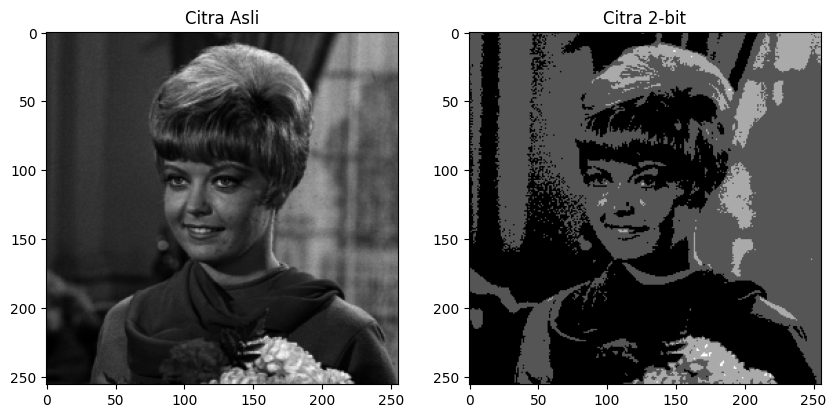

In [ ]:

# Mengimpor library OpenCV dengan alias 'cv'
import cv2 as cv

# Mengimpor library NumPy dengan alias 'np'
import numpy as np

# Mengimpor fungsi 'cv2_imshow' dari 'google.colab.patches' untuk menampilkan gambar di Colab
from google.colab.patches import cv2_imshow

# Mengimpor library Matplotlib dengan alias 'plt'
import matplotlib.pyplot as plt

# Menentukan kedalaman bit yang diinginkan
bit_depth = 2

# Menghitung nilai level (nilai maksimum yang mungkin) sesuai dengan kedalaman bit
level = pow(2, bit_depth) - 1

# Membaca citra masukan dalam skala keabuan
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)

# Membuat citra dengan kedalaman bit yang ditentukan
depth_image = np.zeros(original.shape, original.dtype)

# Melakukan proses kuantisasi citra
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        # Menghitung nilai kuantisasi sesuai dengan rumus
        quantized_value = round((original[i, j] / 255) * level) * (255 / level)
        depth_image[i, j] = quantized_value

# Menampilkan citra dengan kedalaman bit yang ditentukan bersebelahan
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(original, cmap='gray')
plt.axis('on')  # Tampilkan grid

plt.subplot(1, 2, 2)
plt.title(f'Citra {bit_depth}-bit')
plt.imshow(depth_image, cmap='gray')
plt.axis('on')  # Tampilkan grid

plt.show()



3. Buat modul Average Denoising



In [ ]:
# Import library yang dibutuhkan
import cv2 as cv
import numpy as np
import glob
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt

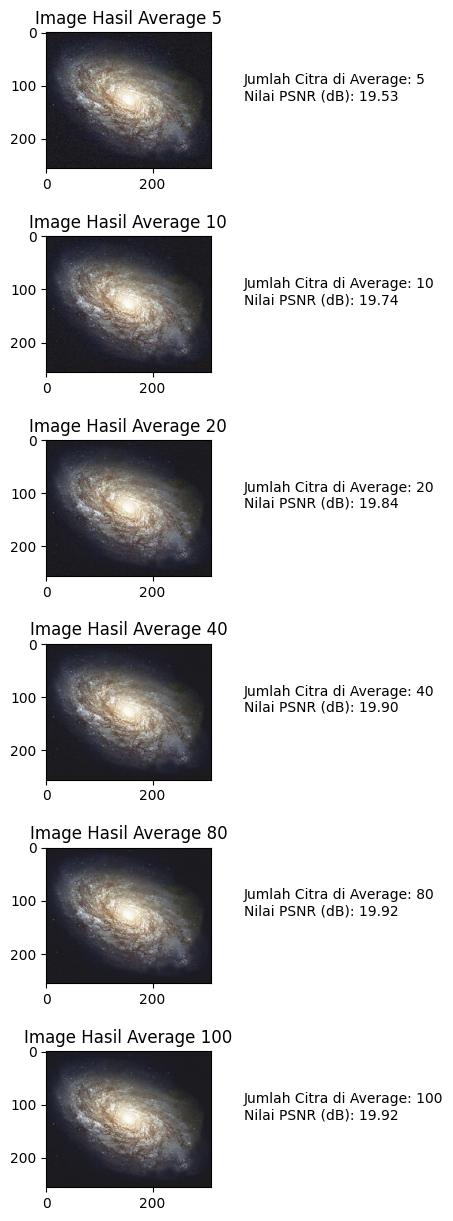

In [9]:
# Membaca citra asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/galksi.jpg')

# Membaca semua citra dengan Gaussian Noise dari folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg' ):
    n = cv.imread(img)
    cv_img.append(n)

# Fungsi untuk denoising rata-rata
def average_denoising(image_list):
    # Menghitung rata-rata citra-citra dengan Gaussian Noise
    average_image = np.zeros(image_list[0].shape, dtype=np.float32)
    for img in image_list:
        average_image += img / len(image_list)

    # Mengkonversi citra rata-rata ke tipe data yang benar
    average_image = average_image.astype(np.uint8)

    return average_image

# Menyiapkan tabel hasil PSNR dan citra hasil average
hasil_psnr = []

# Jumlah citra di Average Image
jumlah_citra_average_image = [5, 10, 20, 40, 80, 100]

# Mencatat hasil PSNR dan citra hasil average
for jumlah_citra in jumlah_citra_average_image:
    # Memilih citra-citra dari cv_img sesuai jumlah_citra
    selected_images = cv_img[:jumlah_citra]

    # Menghilangkan noise dari citra-citra dengan Gaussian Noise
    denoised_image = average_denoising(selected_images)

    # Menghitung PSNR antara citra asli dan citra denoised
    psnr_value = peak_signal_noise_ratio(original_image, denoised_image)

    # Menambahkan hasil PSNR dan citra hasil average ke tabel
    hasil_psnr.append((jumlah_citra, psnr_value, denoised_image))

# Menampilkan tabel hasil PSNR dan citra hasil average dengan border
plt.figure(figsize=(10, 15))  # Increase figsize
for i, (jumlah_citra, psnr_value, avg_image) in enumerate(hasil_psnr):
    plt.subplot(len(hasil_psnr), 2, i * 2 + 1)  # 2 columns for image and info
    plt.imshow(cv.cvtColor(avg_image, cv.COLOR_BGR2RGB))
    plt.axis('on')
    plt.title(f'Image Hasil Average {jumlah_citra}')

    # Menampilkan informasi di sebelah kanan gambar
    info_text = f'Jumlah Citra di Average: {jumlah_citra}\nNilai PSNR (dB): {psnr_value:.2f}'
    plt.text(1.2, 0.5, info_text, fontsize=10, ha='left', transform=plt.gca().transAxes)

    # Add some space between images
    plt.subplots_adjust(hspace=0.5)

plt.show()



kesimpulan:

*  semakin besar nilai PSNR maka gambar yang dihasilkan akan semakin bagus
*  dari hasil percobaan bahwa penggunaan lima citra dalam proses denoising menghasilkan citra yang pecah, sementara pengguna 100 citra menghasilkan citra yang halus. jadi jumlah citra yang digunakan secara signifikan memngaruhi kualitas citra denoised, dengan lebih banyak citra
 cenderung menghasilka hasil yang lebih baik
* dalam kasus ini sekitar 30 citra dalam proses denoising dengan metode average memberikan hasil yang baik (PSNR sekitar 19.9 dB). Penambahan citra lebih lanjut tidak signifikan. Penting memahami titik jenuh untuk efisiensi dalam mengurangi noise pada citra.




4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya: (kelompok 7)

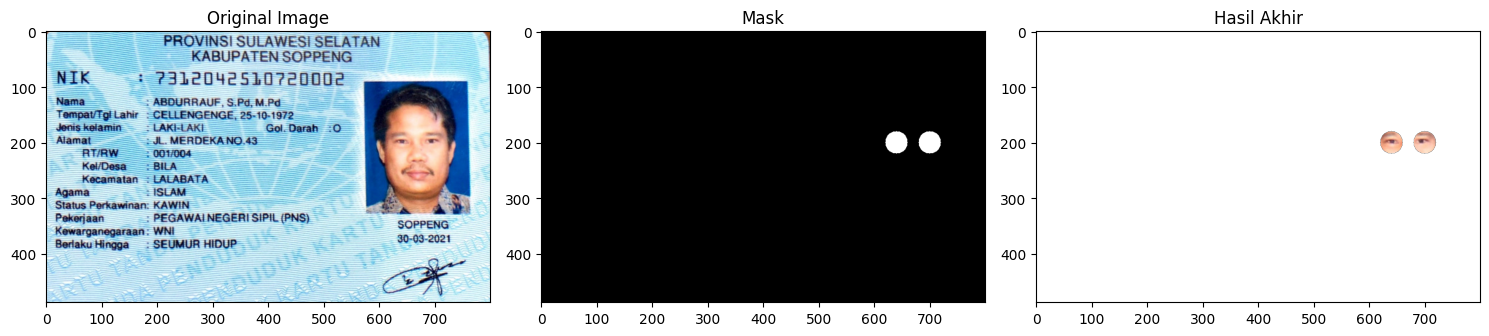

In [14]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/PCVK/ktp.jpg'
original_image = cv.imread(image_path)

# Membuat maska dengan dua lingkaran putih
mask = np.zeros(original_image.shape[:2], dtype="uint8")
cv.circle(mask, (640, 200), 20, 255, -1)
cv.circle(mask, (700, 200), 20, 255, -1)

# Menggunakan operasi bitwise untuk mendapatkan bagian gambar yang ada di dalam maska
masked = cv.bitwise_and(original_image, original_image, mask=mask)

# Mengonversi gambar menjadi grayscale
tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

# Menggunakan teknik thresholding
_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

# Memisahkan saluran warna Red, Green, Blue dari gambar asli
b, g, r = cv.split(masked)

# Membuat list yang berisi saluran warna Red, Green, Blue, dan saluran alpha
rgba = [b, g, r, alpha]

# Menggunakan cv.merge() untuk menggabungkan keempat saluran ke dalam gambar RGBA
final = cv.merge(rgba)

# Menampilkan gambar samping-sampingan menggunakan matplotlib
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(131)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

# Maska
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

# Hasil akhir dengan latar belakang transparan
plt.subplot(133)
plt.imshow(cv.cvtColor(final, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.


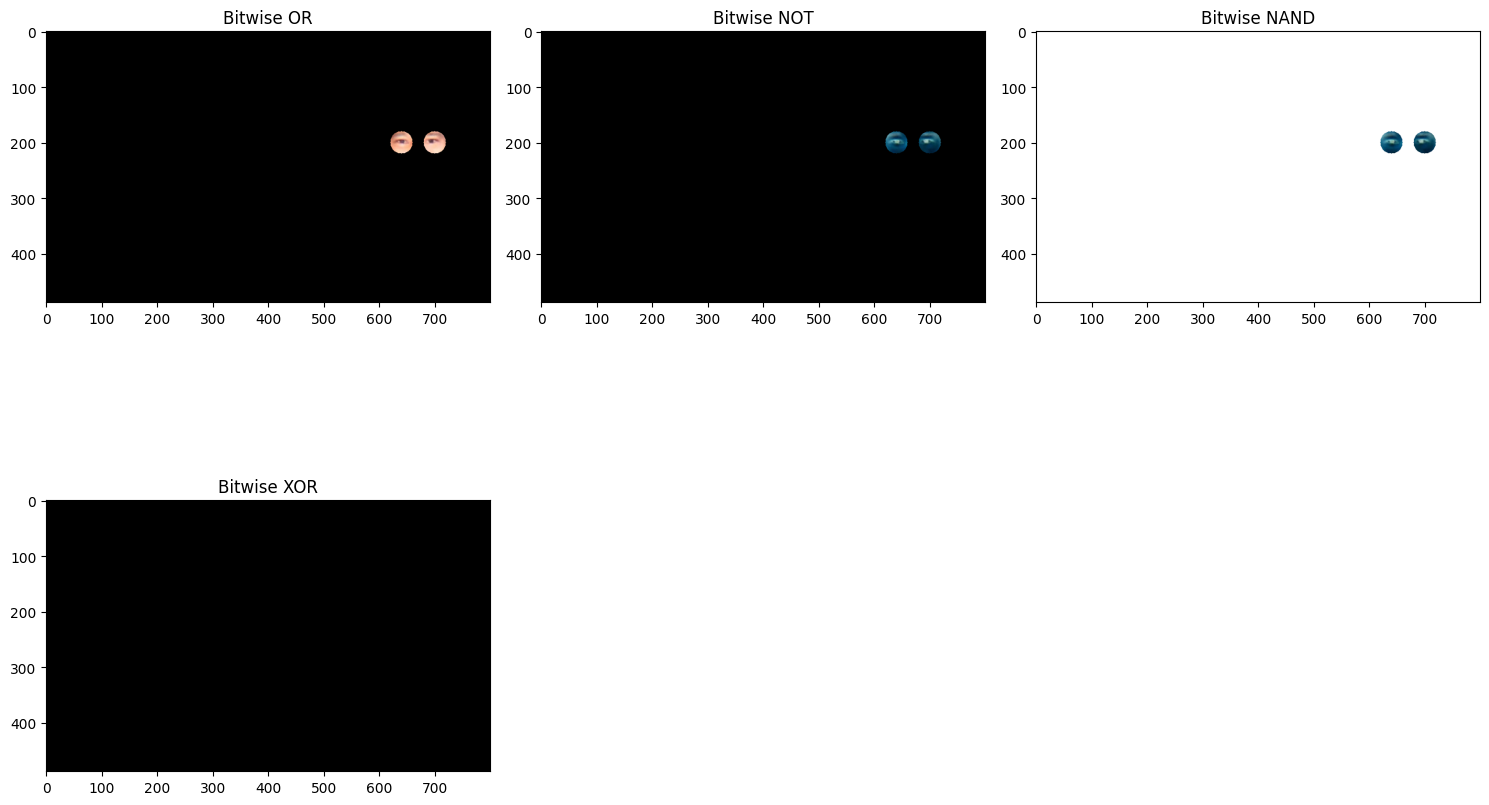

In [17]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli
image_path = '/content/drive/MyDrive/PCVK/ktp.jpg'
original_image = cv.imread(image_path)

# Membuat maska dengan dua lingkaran putih
mask = np.zeros(original_image.shape[:2], dtype="uint8")
cv.circle(mask, (640, 200), 20, 255, -1)
cv.circle(mask, (700, 200), 20, 255, -1)

# Menggunakan operasi bitwise AND untuk mendapatkan bagian gambar yang ada di dalam maska
masked = cv.bitwise_and(original_image, original_image, mask=mask)

# Operasi bitwise OR
bitwise_or = cv.bitwise_or(original_image, original_image, mask=mask)

# Operasi bitwise NOT
bitwise_not = cv.bitwise_not(original_image, mask=mask)

# Operasi bitwise NAND
bitwise_nand = cv.bitwise_not(cv.bitwise_and(original_image, original_image, mask=mask))

# Operasi bitwise XOR
bitwise_xor = cv.bitwise_xor(original_image, original_image, mask=mask)

# Menampilkan gambar samping-sampingan menggunakan matplotlib
plt.figure(figsize=(15, 10))


# Operasi bitwise OR
plt.subplot(231)
plt.imshow(cv.cvtColor(bitwise_or, cv.COLOR_BGR2RGB))
plt.title('Bitwise OR')
plt.axis('on')

# Operasi bitwise NOT
plt.subplot(232)
plt.imshow(cv.cvtColor(bitwise_not, cv.COLOR_BGR2RGB))
plt.title('Bitwise NOT')
plt.axis('on')

# Operasi bitwise NAND
plt.subplot(233)
plt.imshow(cv.cvtColor(bitwise_nand, cv.COLOR_BGR2RGB))
plt.title('Bitwise NAND')
plt.axis('on')

# Operasi bitwise XOR
plt.subplot(234)
plt.imshow(cv.cvtColor(bitwise_xor, cv.COLOR_BGR2RGB))
plt.title('Bitwise XOR')
plt.axis('on')

plt.tight_layout()
plt.show()


kesimpulan:


1. AND Operator dimana operator yang menghasilkan masking selain bagian circle
2. OR Operator dimana menghasilkan masking pada bagian circle
3. NOT Operator dimana menghasilkan masking pada circle dengan warna hitam dan citra negatif pada pixel selain masking
4. NAND Operasi dimana menghasilan masking pada bagian selain circle dengan warna hitam dan citra negatif pada pixel selain bagian maxing
5. XOR Operasi dimana merupakan operatir yang menghasilkan masking pada bagian circle dengan citra negatif

